In [1]:
import os

directory = 'C:\\Users\\User\\OneDrive - Asia Pacific University\\FYP\\NewData'
train_dir = os.path.join(directory, 'train')
val_dir = os.path.join(directory, 'val')
test_dir = os.path.join(directory, 'test')

EfficientNetB0

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

batch_size = 32
img_size   = (224, 224)
datagen    = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# extract embeddings via EfficientNetB0
feature_extractor = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    pooling='avg'
)

X_train = feature_extractor.predict(train_gen, verbose=1)
y_train = train_gen.classes

# SMOTE for data balancing
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Original train distribution:", np.bincount(y_train))
print("After SMOTE:               ", np.bincount(y_res))

# classification head
num_classes = len(train_gen.class_indices)
input_dim   = X_res.shape[1]  # 1280

model = Sequential([
    Input(shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
 
model.fit(
    X_res, y_res,
    epochs=10,
    batch_size=batch_size,
    verbose=2
)

# classification report
class_names  = list(train_gen.class_indices.keys())

print("\nTraining Classification Report:")
y_train_pred_res = np.argmax(model.predict(X_res, verbose=0), axis=1)
print(classification_report(y_res, y_train_pred_res, target_names=class_names))

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
X_val, y_val = feature_extractor.predict(val_gen, verbose=1), val_gen.classes

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
X_test, y_test = feature_extractor.predict(test_gen, verbose=1), test_gen.classes

y_val_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
print("\n📊 Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

y_test_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
print("\n📊 Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print(f"Test Accuracy:       {accuracy_score(y_test, y_test_pred):.4f}")


Found 15251 images belonging to 5 classes.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


477/477 ━━━━━━━━━━━━━━━━━━━━ 404s 843ms/step
Original train distribution: [4208 4051 2448 2374 2170]
After SMOTE:                [4208 4208 4208 4208 4208]
Epoch 1/10
658/658 - 4s - 6ms/step - accuracy: 0.4889 - loss: 1.2183
Epoch 2/10
658/658 - 3s - 5ms/step - accuracy: 0.6066 - loss: 0.9668
Epoch 3/10
658/658 - 3s - 4ms/step - accuracy: 0.6487 - loss: 0.8682
Epoch 4/10
658/658 - 2s - 3ms/step - accuracy: 0.6711 - loss: 0.8099
Epoch 5/10
658/658 - 2s - 4ms/step - accuracy: 0.6917 - loss: 0.7646
Epoch 6/10
658/658 - 2s - 4ms/step - accuracy: 0.7182 - loss: 0.7175
Epoch 7/10
658/658 - 4s - 6ms/step - accuracy: 0.7336 - loss: 0.6819
Epoch 8/10
658/658 - 5s - 7ms/step - accuracy: 0.7448 - loss: 0.6558
Epoch 9/10
658/658 - 4s - 6ms/step - accuracy: 0.7584 - loss: 0.6306
Epoch 10/10
658/658 - 4s - 6ms/step - accuracy: 0.7682 - loss: 0.6024

Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4208
           

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step
Found 1907 images belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step

📊 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       526
           1       0.75      0.63      0.69       506
           2       0.56      0.69      0.61       306
           3       0.80      0.73      0.76       297
           4       0.78      0.93      0.85       271

    accuracy                           0.74      1906
   macro avg       0.74      0.75      0.74      1906
weighted avg       0.75      0.74      0.74      1906

Validation Accuracy: 0.7387

📊 Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       526
           1       0.74      0.65      0.70       507
           2       0.56      0.71      0.63       306
           3       0.75      0.73      0.74       297
           4       0.80 

Hyperparameter Tuning

Keras Tuner - Random Search

In [ ]:
import numpy as np
import keras_tuner as kt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications.efficientnet import EfficientNetB0

feature_extractor = EfficientNetB0(weights='imagenet',
                                   include_top=False,
                                   pooling='avg')

def extract_embeddings(directory):
    gen = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )
    X = feature_extractor.predict(gen, verbose=1)
    y = gen.classes
    return X, y, list(gen.class_indices.keys())

X_train, y_train, class_names = extract_embeddings(train_dir)
X_val,   y_val,   _           = extract_embeddings(val_dir)
X_test,  y_test,  _           = extract_embeddings(test_dir)

#SMOTE
sm     = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

input_dim = X_res.shape[1]
num_classes = len(class_names)

#tuner build function
def build_head(hp):
    units        = hp.Choice('units', [128, 256, 512])
    dropout_rate = hp.Float('dropout_rate', 0.2, 0.6, step=0.1)
    lr           = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')

    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_head,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='efficientnet_head'
)
tuner.search(
    X_res, y_res,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp    = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:")
print(f"  units        = {best_hp.get('units')}")
print(f"  dropout_rate = {best_hp.get('dropout_rate'):.2f}")
print(f"  learning_rate= {best_hp.get('learning_rate'):.1e}")


print("\nTraining Classification Report:")
y_train_pred_res = np.argmax(best_model.predict(X_res, verbose=0), axis=1)
print(classification_report(y_res, y_train_pred_res, target_names=class_names))
print(f"Training Accuracy: {accuracy_score(y_res, y_train_pred_res):.4f}")

# Evaluate on validation set
y_val_pred = np.argmax(best_model.predict(X_val, verbose=0), axis=1)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Found 15251 images belonging to 5 classes.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


477/477 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step
Found 1906 images belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
Found 1907 images belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step
Reloading Tuner from tuner_dir\efficientnet_head\tuner0.json



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters:
  units        = 512
  dropout_rate = 0.30
  learning_rate= 5.7e-04

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4208
           1       0.84      0.87      0.85      4208
           2       0.93      0.88      0.90      4208
           3       0.93      0.96      0.94      4208
           4       0.98      0.98      0.98      4208

    accuracy                           0.91     21040
   macro avg       0.92      0.91      0.91     21040
weighted avg       0.92      0.91      0.91     21040

Training Accuracy: 0.9146

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       526
           1       0.79      0.77      0.78       506
           2       0.76      0.71      0.73       306
           3       0.81      0.87      0.84       297
           4       0.88      0.92      0.90       271

 

Keras Tuner - Grid Search

In [ ]:
import numpy as np
import keras_tuner as kt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications.efficientnet import EfficientNetB0

feature_extractor = EfficientNetB0(weights='imagenet',
                                   include_top=False,
                                   pooling='avg')

def extract_embeddings(directory):
    gen = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )
    X = feature_extractor.predict(gen, verbose=1)
    y = gen.classes
    return X, y, list(gen.class_indices.keys())

X_train, y_train, class_names = extract_embeddings(train_dir)
X_val,   y_val,   _           = extract_embeddings(val_dir)
X_test,  y_test,  _           = extract_embeddings(test_dir)

#SMOTE
sm     = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

input_dim = X_res.shape[1]
num_classes = len(class_names)

#tuner build function
def build_head(hp):
    units        = hp.Choice('units', [128, 256, 512])
    dropout_rate = hp.Float('dropout_rate', 0.2, 0.6, step=0.1)
    lr           = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')

    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.GridSearch(
    build_head,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='efficientnet_head'
)
tuner.search(
    X_res, y_res,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

# retrieve the best model
best_model_gs = tuner.get_best_models(num_models=1)[0]
best_hp_gs    = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:")
print(f"  units        = {best_hp_gs.get('units')}")
print(f"  dropout_rate = {best_hp_gs.get('dropout_rate'):.2f}")
print(f"  learning_rate= {best_hp_gs.get('learning_rate'):.1e}")


print("\nTraining Classification Report:")
y_train_pred_res = np.argmax(best_model_gs.predict(X_res, verbose=0), axis=1)
print(classification_report(y_res, y_train_pred_res, target_names=class_names))
print(f"Training Accuracy: {accuracy_score(y_res, y_train_pred_res):.4f}")

# Evaluate on validation set
y_val_pred = np.argmax(best_model_gs.predict(X_val, verbose=0), axis=1)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


Found 15251 images belonging to 5 classes.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


477/477 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step
Found 1906 images belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 893ms/step
Found 1907 images belonging to 5 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 59s 982ms/step
Reloading Tuner from tuner_dir\efficientnet_head\tuner0.json


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters:
  units        = 512
  dropout_rate = 0.30
  learning_rate= 5.7e-04

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4208
           1       0.84      0.87      0.85      4208
           2       0.93      0.88      0.90      4208
           3       0.93      0.96      0.94      4208
           4       0.98      0.98      0.98      4208

    accuracy                           0.91     21040
   macro avg       0.92      0.91      0.91     21040
weighted avg       0.92      0.91      0.91     21040

Training Accuracy: 0.9146

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       526
           1       0.79      0.77      0.78       506
           2       0.76      0.71      0.73       306
           3       0.81      0.87      0.84       297
           4       0.88      0.92      0.90       271

 

Optuna

In [ ]:
import numpy as np
import optuna
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Dense, Dropout, BatchNormalization, Activation)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score

input_dim   = X_res.shape[1]
num_classes = len(class_names)

def build_and_train(trial):
    units        = trial.suggest_categorical('units', [64, 128, 256])
    dropout_rate = trial.suggest_float('dropout_rate', 0.3, 0.7, step=0.1)
    l2_reg       = trial.suggest_float('l2_reg', 1e-6, 1e-2, log=True)
    lr           = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    batch_size   = trial.suggest_categorical('batch_size', [16, 32])
    epochs       = trial.suggest_int('epochs', 10, 50, step=10)

    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(units, kernel_regularizer=keras.regularizers.l2(l2_reg)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(units//2, kernel_regularizer=keras.regularizers.l2(l2_reg)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    es = EarlyStopping('val_loss', patience=5, restore_best_weights=True)
    rp = ReduceLROnPlateau('val_loss', factor=0.5, patience=3, min_lr=1e-6)

    hist = model.fit(
        X_res, y_res,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es, rp],
        verbose=0
    )
    return float(max(hist.history['val_accuracy']))

study = optuna.create_study(direction='maximize')
study.optimize(build_and_train, n_trials=20, show_progress_bar=True)

print("🔍 Best hyperparameters:", study.best_params)

bp = study.best_params
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(bp['units'], kernel_regularizer=keras.regularizers.l2(bp['l2_reg'])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(bp['dropout_rate']),

    Dense(bp['units']//2, kernel_regularizer=keras.regularizers.l2(bp['l2_reg'])),
    BatchNormalization(),
    Activation('relu'),
    Dropout(bp['dropout_rate']),

    Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=bp['learning_rate']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping('val_loss', patience=5, restore_best_weights=True)
rp = ReduceLROnPlateau('val_loss', factor=0.5, patience=3, min_lr=1e-6)

print("Training final model...")
model.fit(
    X_res, y_res,
    validation_data=(X_val, y_val),
    epochs=bp['epochs'],
    batch_size=bp['batch_size'],
    callbacks=[es, rp],
    verbose=2
)

def report(name, X, y):
    loss, acc = model.evaluate(X, y, verbose=0)
    preds = np.argmax(model.predict(X, verbose=0), axis=1)
    print(f"\n📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y, preds,
                                target_names=class_names,
                                digits=4))

report("Train (SMOTE)", X_res, y_res)
report("Validation",     X_val,   y_val)

[I 2025-07-01 22:55:35,542] A new study created in memory with name: no-name-f1a08617-6de7-4862-9c5d-9259b8bcb0ba
Best trial: 0. Best value: 0.732424:   5%|▌         | 1/20 [02:34<48:46, 154.01s/it]

[I 2025-07-01 22:58:10,143] Trial 0 finished with value: 0.7324239015579224 and parameters: {'units': 128, 'dropout_rate': 0.5, 'l2_reg': 0.0002603527408625355, 'learning_rate': 0.00018408243563977728, 'batch_size': 32, 'epochs': 10}. Best is trial 0 with value: 0.7324239015579224.


Best trial: 1. Best value: 0.776495:  10%|█         | 2/20 [12:25<2:03:19, 411.10s/it]

[I 2025-07-01 23:08:01,040] Trial 1 finished with value: 0.7764952778816223 and parameters: {'units': 128, 'dropout_rate': 0.6000000000000001, 'l2_reg': 3.985543144337668e-05, 'learning_rate': 5.8238600174688275e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 1 with value: 0.7764952778816223.


Best trial: 1. Best value: 0.776495:  15%|█▌        | 3/20 [18:00<1:46:39, 376.45s/it]

[I 2025-07-01 23:13:36,356] Trial 2 finished with value: 0.7712486982345581 and parameters: {'units': 64, 'dropout_rate': 0.6000000000000001, 'l2_reg': 1.9270997469056713e-05, 'learning_rate': 0.00037120805970110353, 'batch_size': 32, 'epochs': 30}. Best is trial 1 with value: 0.7764952778816223.


Best trial: 1. Best value: 0.776495:  20%|██        | 4/20 [28:27<2:06:46, 475.41s/it]

[I 2025-07-01 23:24:03,508] Trial 3 finished with value: 0.715110182762146 and parameters: {'units': 128, 'dropout_rate': 0.6000000000000001, 'l2_reg': 4.47961034995307e-06, 'learning_rate': 2.10074617001977e-05, 'batch_size': 16, 'epochs': 40}. Best is trial 1 with value: 0.7764952778816223.


Best trial: 4. Best value: 0.780168:  25%|██▌       | 5/20 [30:41<1:28:04, 352.32s/it]

[I 2025-07-01 23:26:17,632] Trial 4 finished with value: 0.7801678776741028 and parameters: {'units': 128, 'dropout_rate': 0.6000000000000001, 'l2_reg': 2.4358504518805003e-06, 'learning_rate': 0.00035243734455897465, 'batch_size': 32, 'epochs': 20}. Best is trial 4 with value: 0.7801678776741028.


Best trial: 5. Best value: 0.802728:  30%|███       | 6/20 [37:38<1:27:22, 374.45s/it]

[I 2025-07-01 23:33:14,799] Trial 5 finished with value: 0.8027282357215881 and parameters: {'units': 128, 'dropout_rate': 0.7, 'l2_reg': 0.00017592543454776182, 'learning_rate': 0.0002987889247003127, 'batch_size': 32, 'epochs': 50}. Best is trial 5 with value: 0.8027282357215881.


Best trial: 5. Best value: 0.802728:  35%|███▌      | 7/20 [45:57<1:29:56, 415.10s/it]

[I 2025-07-01 23:41:33,155] Trial 6 finished with value: 0.7707240581512451 and parameters: {'units': 256, 'dropout_rate': 0.7, 'l2_reg': 1.5640859325538905e-06, 'learning_rate': 0.0007399977589353806, 'batch_size': 16, 'epochs': 20}. Best is trial 5 with value: 0.8027282357215881.


Best trial: 5. Best value: 0.802728:  40%|████      | 8/20 [49:07<1:08:41, 343.45s/it]

[I 2025-07-01 23:44:43,757] Trial 7 finished with value: 0.6794333457946777 and parameters: {'units': 64, 'dropout_rate': 0.6000000000000001, 'l2_reg': 2.3030330063236547e-05, 'learning_rate': 0.00012160565752071702, 'batch_size': 16, 'epochs': 10}. Best is trial 5 with value: 0.8027282357215881.


Best trial: 5. Best value: 0.802728:  45%|████▌     | 9/20 [51:11<50:23, 274.85s/it]  

[I 2025-07-01 23:46:47,810] Trial 8 finished with value: 0.7675760984420776 and parameters: {'units': 128, 'dropout_rate': 0.5, 'l2_reg': 7.862274566941003e-06, 'learning_rate': 0.0005552121491412785, 'batch_size': 32, 'epochs': 10}. Best is trial 5 with value: 0.8027282357215881.


Best trial: 5. Best value: 0.802728:  50%|█████     | 10/20 [59:36<57:37, 345.76s/it]

[I 2025-07-01 23:55:12,283] Trial 9 finished with value: 0.6920251846313477 and parameters: {'units': 128, 'dropout_rate': 0.6000000000000001, 'l2_reg': 0.0003264701649918174, 'learning_rate': 2.1510371756584398e-05, 'batch_size': 16, 'epochs': 30}. Best is trial 5 with value: 0.8027282357215881.


Best trial: 10. Best value: 0.862015:  55%|█████▌    | 11/20 [1:11:34<1:08:58, 459.88s/it]

[I 2025-07-02 00:07:10,768] Trial 10 finished with value: 0.8620147109031677 and parameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.004890890570873024, 'learning_rate': 5.528621124304433e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 10 with value: 0.8620147109031677.


Best trial: 11. Best value: 0.864638:  60%|██████    | 12/20 [1:17:42<57:34, 431.75s/it]  

[I 2025-07-02 00:13:17,970] Trial 11 finished with value: 0.8646379709243774 and parameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.005417781106641969, 'learning_rate': 5.998480178132845e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  65%|██████▌   | 13/20 [1:21:19<42:46, 366.69s/it]

[I 2025-07-02 00:16:55,437] Trial 12 finished with value: 0.854669451713562 and parameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.008619827174758319, 'learning_rate': 5.033890060234695e-05, 'batch_size': 32, 'epochs': 40}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  70%|███████   | 14/20 [1:25:12<32:37, 326.31s/it]

[I 2025-07-02 00:20:48,431] Trial 13 finished with value: 0.7864637970924377 and parameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.0075307441420545615, 'learning_rate': 1.1520215034253241e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  75%|███████▌  | 15/20 [1:29:08<24:55, 299.10s/it]

[I 2025-07-02 00:24:44,468] Trial 14 finished with value: 0.8389297127723694 and parameters: {'units': 256, 'dropout_rate': 0.4, 'l2_reg': 0.001691655079051011, 'learning_rate': 7.007121707821201e-05, 'batch_size': 32, 'epochs': 40}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  80%|████████  | 16/20 [1:33:41<19:25, 291.40s/it]

[I 2025-07-02 00:29:17,997] Trial 15 finished with value: 0.8252885341644287 and parameters: {'units': 256, 'dropout_rate': 0.4, 'l2_reg': 0.0014807957949148774, 'learning_rate': 3.305369229739583e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  85%|████████▌ | 17/20 [1:37:15<13:23, 267.96s/it]

[I 2025-07-02 00:32:51,449] Trial 16 finished with value: 0.8499475121498108 and parameters: {'units': 256, 'dropout_rate': 0.4, 'l2_reg': 0.001523174582951193, 'learning_rate': 0.00012059702386800444, 'batch_size': 32, 'epochs': 40}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  90%|█████████ | 18/20 [1:41:29<08:47, 263.90s/it]

[I 2025-07-02 00:37:05,884] Trial 17 finished with value: 0.8420776724815369 and parameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.0043998553912564424, 'learning_rate': 3.509926322642882e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638:  95%|█████████▌| 19/20 [1:47:17<04:49, 289.22s/it]

[I 2025-07-02 00:42:54,088] Trial 18 finished with value: 0.8457502722740173 and parameters: {'units': 256, 'dropout_rate': 0.4, 'l2_reg': 0.0006891425936535476, 'learning_rate': 9.43750066920319e-05, 'batch_size': 16, 'epochs': 40}. Best is trial 11 with value: 0.8646379709243774.


Best trial: 11. Best value: 0.864638: 100%|██████████| 20/20 [1:49:08<00:00, 327.42s/it]


[I 2025-07-02 00:44:44,624] Trial 19 finished with value: 0.6731374859809875 and parameters: {'units': 64, 'dropout_rate': 0.3, 'l2_reg': 0.0030654046256970583, 'learning_rate': 1.1210206819511483e-05, 'batch_size': 32, 'epochs': 30}. Best is trial 11 with value: 0.8646379709243774.
🔍 Best hyperparameters: {'units': 256, 'dropout_rate': 0.3, 'l2_reg': 0.005417781106641969, 'learning_rate': 5.998480178132845e-05, 'batch_size': 32, 'epochs': 50}
Training final model...
Epoch 1/50
658/658 - 18s - 27ms/step - accuracy: 0.4277 - loss: 4.4205 - val_accuracy: 0.5929 - val_loss: 3.7645 - learning_rate: 5.9985e-05
Epoch 2/50
658/658 - 5s - 8ms/step - accuracy: 0.5584 - loss: 3.6591 - val_accuracy: 0.6422 - val_loss: 3.2605 - learning_rate: 5.9985e-05
Epoch 3/50
658/658 - 5s - 8ms/step - accuracy: 0.6088 - loss: 3.1900 - val_accuracy: 0.6794 - val_loss: 2.8641 - learning_rate: 5.9985e-05
Epoch 4/50
658/658 - 5s - 7ms/step - accuracy: 0.6460 - loss: 2.8154 - val_accuracy: 0.6999 - val_loss: 2.559

In [8]:
y_test_pred = np.argmax(best_model.predict(X_test, verbose=0), axis=1)
print("\n📊 Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names, digits=4))
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


📊 Test Classification Report:
              precision    recall  f1-score   support

           0     0.8693    0.8346    0.8516       526
           1     0.7688    0.8067    0.7873       507
           2     0.7624    0.7549    0.7586       306
           3     0.8741    0.8418    0.8576       297
           4     0.9004    0.9336    0.9167       271

    accuracy                         0.8296      1907
   macro avg     0.8350    0.8343    0.8344      1907
weighted avg     0.8306    0.8296    0.8298      1907

Test Accuracy: 0.8296


Graphs

Learning Curve

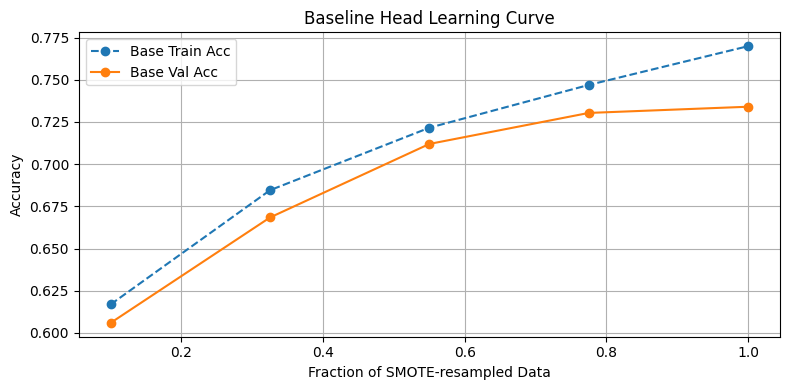

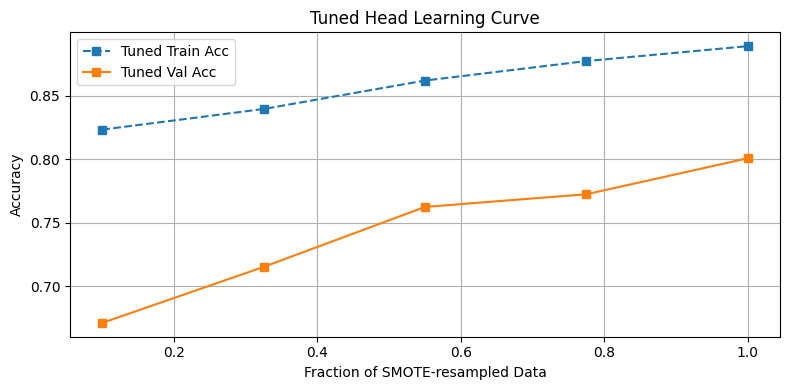

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Fractions of SMOTE data to sample
fractions = np.linspace(0.1, 1.0, 5)

train_acc_base = []
val_acc_base   = []
train_acc_tuned= []
val_acc_tuned  = []

for frac in fractions:
    if frac < 1.0:
        sss = StratifiedShuffleSplit(n_splits=1, train_size=frac, random_state=42)
        idx, _ = next(sss.split(X_res, y_res))
        X_frac, y_frac = X_res[idx], y_res[idx]
    else:
        X_frac, y_frac = X_res, y_res

    K.clear_session()
    model_base = Sequential([
        Input(shape=(input_dim,)),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model_base.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist_base = model_base.fit(
        X_frac, y_frac,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=0
    )
    train_acc_base.append(hist_base.history['accuracy'][-1])
    val_acc_base  .append(hist_base.history['val_accuracy'][-1])

    K.clear_session()
    model_tuned = Sequential([
        Input(shape=(input_dim,)),
        Dense(bp.get('units'), activation='relu'),
        Dropout(bp.get('dropout_rate')),
        Dense(num_classes, activation='softmax')
    ])
    model_tuned.compile(
        optimizer=Adam(learning_rate=bp.get('learning_rate')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist_tuned = model_tuned.fit(
        X_frac, y_frac,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=0
    )
    train_acc_tuned.append(hist_tuned.history['accuracy'][-1])
    val_acc_tuned  .append(hist_tuned.history['val_accuracy'][-1])

#Baseline learning curve
plt.figure(figsize=(8,4))
plt.plot(fractions, train_acc_base, 'o--', label='Base Train Acc')
plt.plot(fractions, val_acc_base,   'o-',  label='Base Val Acc')
plt.title("Baseline Head Learning Curve")
plt.xlabel("Fraction of SMOTE-resampled Data")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

#Tuned learning curve
plt.figure(figsize=(8,4))
plt.plot(fractions, train_acc_tuned, 's--', label='Tuned Train Acc')
plt.plot(fractions, val_acc_tuned,   's-',  label='Tuned Val Acc')
plt.title("Tuned Head Learning Curve")
plt.xlabel("Fraction of SMOTE-resampled Data")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

plt.show()


Loss Curve

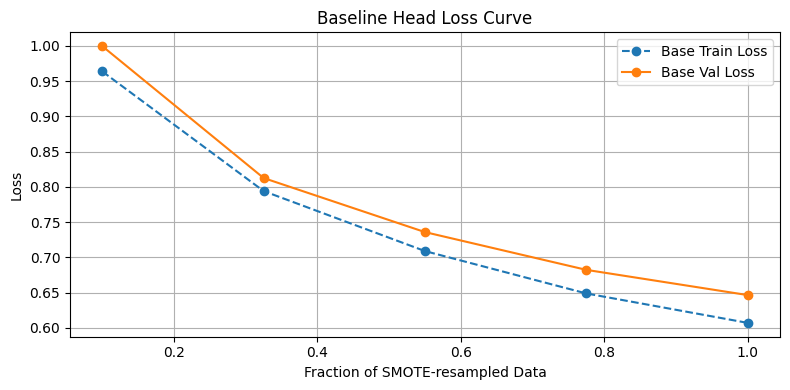

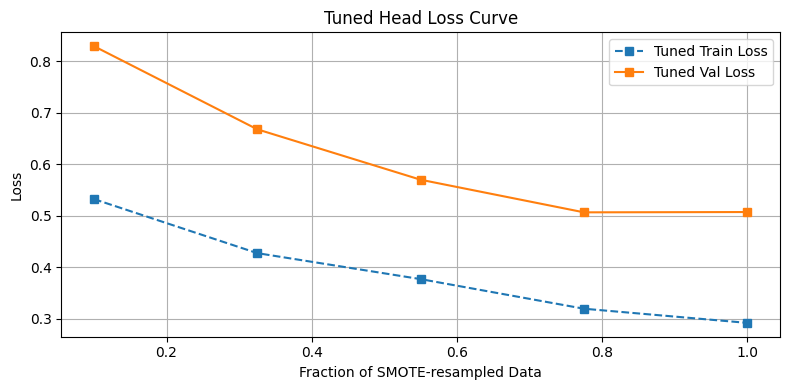

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Fractions of SMOTE-resampled data
fractions = np.linspace(0.1, 1.0, 5)

train_loss_base = []
val_loss_base   = []
train_loss_tuned = []
val_loss_tuned   = []

for frac in fractions:
    if frac < 1.0:
        sss = StratifiedShuffleSplit(n_splits=1, train_size=frac, random_state=42)
        idx, _ = next(sss.split(X_res, y_res))
        X_frac, y_frac = X_res[idx], y_res[idx]
    else:
        X_frac, y_frac = X_res, y_res

    # Baseline head
    K.clear_session()
    model_base = Sequential([
        Input(shape=(input_dim,)),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model_base.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist_base = model_base.fit(
        X_frac, y_frac,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=0
    )
    train_loss_base.append(hist_base.history['loss'][-1])
    val_loss_base.append(hist_base.history['val_loss'][-1])

    # Tuned head
    K.clear_session()
    model_tuned = Sequential([
        Input(shape=(input_dim,)),
        Dense(bp.get('units'), activation='relu'),
        Dropout(bp.get('dropout_rate')),
        Dense(num_classes, activation='softmax')
    ])
    model_tuned.compile(
        optimizer=Adam(learning_rate=bp.get('learning_rate')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist_tuned = model_tuned.fit(
        X_frac, y_frac,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=0
    )
    train_loss_tuned.append(hist_tuned.history['loss'][-1])
    val_loss_tuned.append(hist_tuned.history['val_loss'][-1])

# Baseline Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(fractions, train_loss_base, 'o--', label='Base Train Loss')
plt.plot(fractions, val_loss_base,   'o-',  label='Base Val Loss')
plt.title("Baseline Head Loss Curve")
plt.xlabel("Fraction of SMOTE-resampled Data")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tuned Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(fractions, train_loss_tuned, 's--', label='Tuned Train Loss')
plt.plot(fractions, val_loss_tuned,   's-',  label='Tuned Val Loss')
plt.title("Tuned Head Loss Curve")
plt.xlabel("Fraction of SMOTE-resampled Data")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Confusion Matrix

<Figure size 600x600 with 0 Axes>

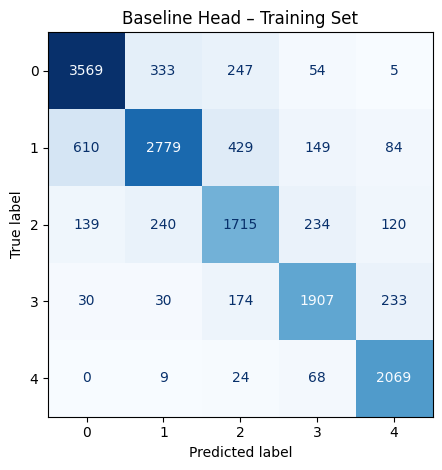

<Figure size 600x600 with 0 Axes>

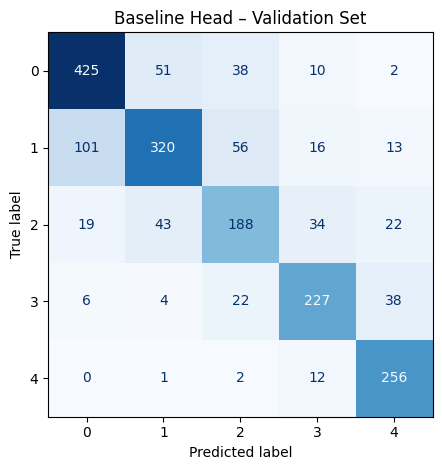

<Figure size 600x600 with 0 Axes>

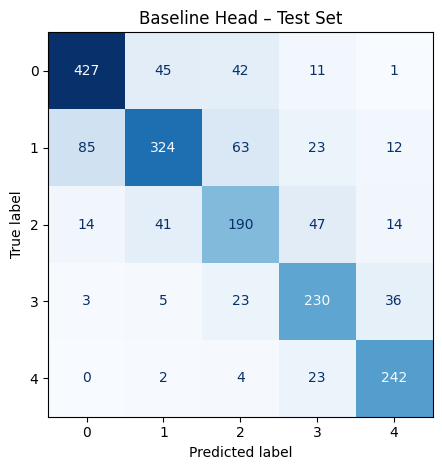

<Figure size 600x600 with 0 Axes>

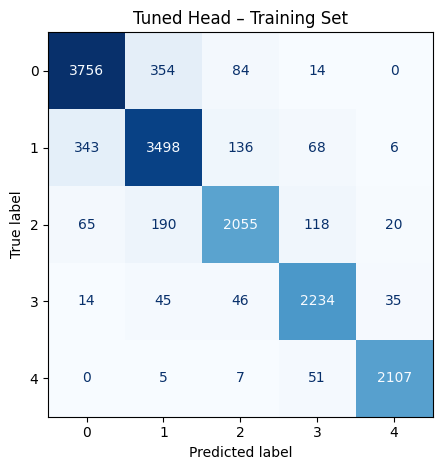

<Figure size 600x600 with 0 Axes>

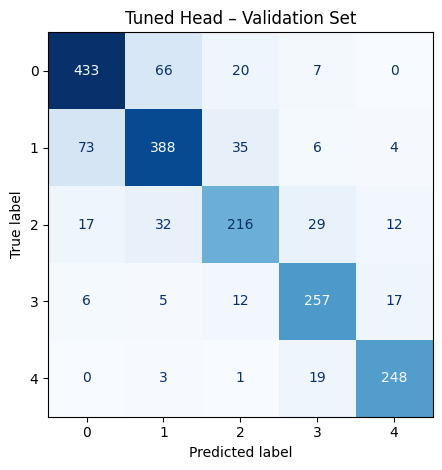

<Figure size 600x600 with 0 Axes>

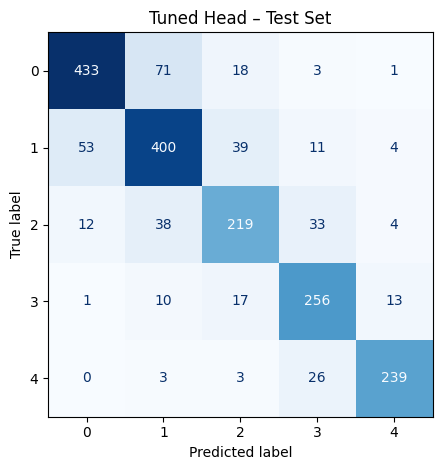

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def plot_cm(model, X, y, labels, title):
    y_pred = np.argmax(model.predict(X, verbose=0), axis=1)
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_cm(model, X_train, y_train, class_names, "Baseline Head – Training Set")
plot_cm(model, X_val,   y_val,   class_names, "Baseline Head – Validation Set")
plot_cm(model, X_test,  y_test,  class_names, "Baseline Head – Test Set")

plot_cm(best_model,  X_train, y_train, class_names, "Tuned Head – Training Set")
plot_cm(best_model,  X_val,   y_val,   class_names, "Tuned Head – Validation Set")
plot_cm(best_model,  X_test,  y_test,  class_names, "Tuned Head – Test Set")


ROC Curve

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


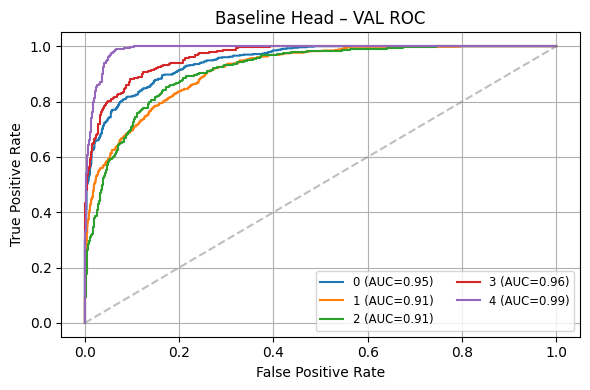

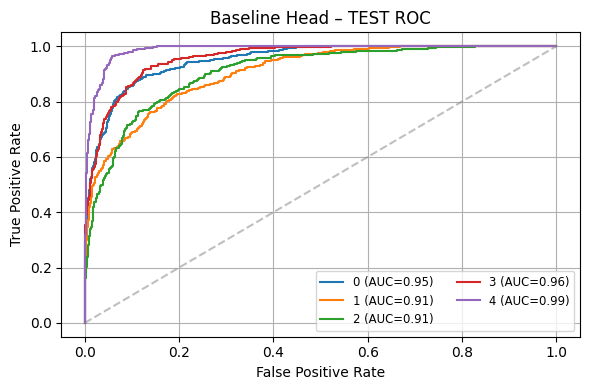

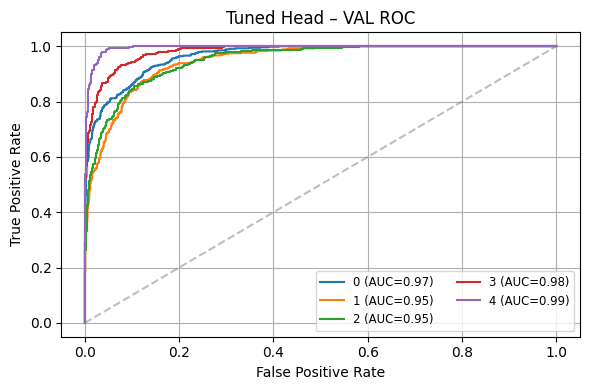

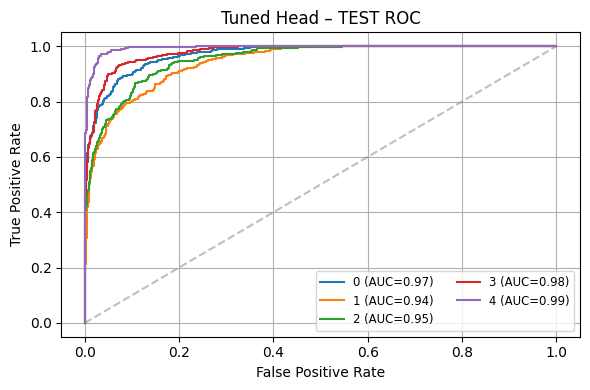

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

num_classes = len(class_names)

#Binarize true labels
y_val_bin   = label_binarize(y_val,   classes=list(range(num_classes)))
y_test_bin  = label_binarize(y_test,  classes=list(range(num_classes)))

y_val_prob_base    = model.predict(X_val)
y_test_prob_base   = model.predict(X_test)

y_val_prob_tuned   = best_model.predict(X_val)
y_test_prob_tuned  = best_model.predict(X_test)

def compute_roc(y_bin, y_prob):
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc[i]        = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

fpr_val_b, tpr_val_b, auc_val_b = compute_roc(y_val_bin, y_val_prob_base)
fpr_te_b, tpr_te_b, auc_te_b = compute_roc(y_test_bin, y_test_prob_base)

fpr_val_t, tpr_val_t, auc_val_t = compute_roc(y_val_bin, y_val_prob_tuned)
fpr_te_t, tpr_te_t, auc_te_t = compute_roc(y_test_bin, y_test_prob_tuned)

def plot_roc(fpr, tpr, aucs, title):
    plt.figure(figsize=(6,4))
    for i, label in enumerate(class_names):
        plt.plot(fpr[i], tpr[i], label=f"{label} (AUC={aucs[i]:.2f})")
    plt.plot([0,1],[0,1],'--', color='gray', alpha=0.5)
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc(fpr_val_b, tpr_val_b, auc_val_b, "Baseline Head – VAL ROC")
plot_roc(fpr_te_b,  tpr_te_b,  auc_te_b,  "Baseline Head – TEST ROC")

plot_roc(fpr_val_t, tpr_val_t, auc_val_t, "Tuned Head – VAL ROC")
plot_roc(fpr_te_t,  tpr_te_t,  auc_te_t,  "Tuned Head – TEST ROC")
